In [5]:
import stan
import nest_asyncio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
from scipy.stats import binom, beta, gamma, poisson, norm

nest_asyncio.apply()  # required to run in notebook

# Chapter 6 Exercises

## Exercise 6.12

a. $Y|\pi \sim Bin(20,\pi)$ and $\pi ~ Beta(1,1)$ with $Y = 12$

 
```
model = """data {
    int<lower=0, upper=20> Y;
}
parameters {
    real<lower=0, upper =1> pi;
}

model {
    Y ~ binomial(20, pi);
    pi ~ beta(2,2);
}"""

posterior = stan.build(model, data={'Y':12}
fit = posterior.sample(num_chains=4, num_samples=1000)

```

b. $Y|\lambda \sim Pois(\lambda)$ and $\lambda \sim Gamma(4,2)$ with $Y=3$

 
```
model = """data {
    int<lower=0> Y;
}
parameters {
    real<lower=0> lambda;
}

model {
    Y ~ poisson(lambda);
    lambda ~ gamma(4,2);
}"""

posterior = stan.build(model, data={'Y':3}
fit = posterior.sample(num_chains=4, num_samples=1000)

```

c. $Y|\mu \sim N(\mu, 1^2)$ and $\mu \sim N(0,10^2)$ with $Y=12.2$

 
```
model = """data {
   real Y;
}
parameters {
    real mu;
}

model {
    Y ~ normal(mu,1);
    mu ~ normal(0,100);
}"""

posterior = stan.build(model, data={'Y':12.2}
fit = posterior.sample(num_chains=4, num_samples=1000)
```

## Exercise 6.13

Consider Beta binomial (in model below), with Y = 2 successes. 

In [15]:
model = """data {
    int<lower=0, upper=10> Y;
}
parameters {
    real<lower=0, upper =1> pi;
}

model {
    Y ~ binomial(10, pi);
    pi ~ beta(3,8);
}"""
 

Simulate model with 3 chains and 12000 iterations per chain, produce trace plots for the frames,  compare density plots to true posterior

In [ ]:

posterior = stan.build(model, data={'Y':2})
fit = posterior.sample(num_chains=3, num_samples=12000)

array([[<AxesSubplot:title={'center':'pi'}>,
        <AxesSubplot:title={'center':'pi'}>]], dtype=object)

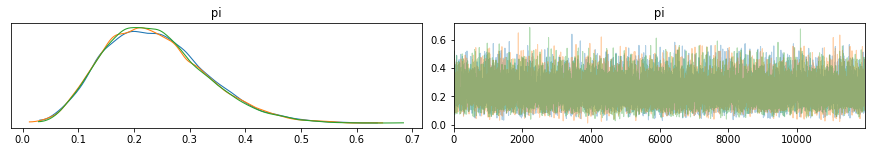

In [27]:
az.plot_trace(fit, compact = False)

<AxesSubplot:title={'center':'pi'}>

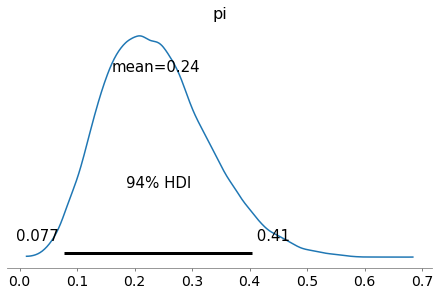

In [25]:
az.plot_posterior(fit)